In [ ]:
!pip install ktrain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ktrain
from ktrain import text

     |████████████████████████████████| 25.3 MB 100 kB/s 
     |████████████████████████████████| 6.8 MB 47.0 MB/s 
     |████████████████████████████████| 981 kB 33.2 MB/s 
     |████████████████████████████████| 263 kB 52.8 MB/s 
     |████████████████████████████████| 1.9 MB 38.9 MB/s 
     |████████████████████████████████| 1.2 MB 37.8 MB/s 
     |████████████████████████████████| 468 kB 56.1 MB/s 
     |████████████████████████████████| 895 kB 30.8 MB/s 
     |████████████████████████████████| 3.3 MB 29.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=a26e45ef29c042601d529ebc9bed26a48041a356358568182ca92e2ec680f4bd
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=33bcb7b8935f3ae2b8622c83d4b2d99a438be134e624af700c1cec0f932c6c82
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff

In [ ]:
def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
      df.apply(np.random.shuffle, axis=axis)
    return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ResearchData/FinalDataSet.xlsx')

In [ ]:
data.sort_values(by='Emoji', axis=0, inplace=True)

data.set_index(keys=['Emoji'], drop=False,inplace=True)

Emojis=data['Emoji'].unique().tolist()

In [ ]:
data_train = pd.read_excel('/content/drive/MyDrive/ResearchData/FinalDataSet.xlsx')
data_train['Comments'] = data_train['Comments'].astype(str)

data_test = pd.read_excel('/content/drive/MyDrive/ResearchData/FinalDataSet.xlsx')
data_test['Comments'] = data_train['Comments'].astype(str)

x_train = data_train.Comments.tolist()
x_test = data_test.Comments.tolist()

y_train = data_train.Emoji.tolist()
y_test = data_test.Emoji.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['💁', '🤦', '🤷']

print('size of training set: %s' % (len(data_train['Comments'])))
print('size of validation set: %s' % (len(data_test['Comments'])))
print(data.Emoji.value_counts())

data.head(10)

size of training set: 3373
size of validation set: 3373
🤷    2264
💁    2242
🤦    2240
Name: Emoji, dtype: int64


,Comments,Category,Emoji
0,পৃথিবীতে যত রাস্তার শিশু রয়েছে সেখানে তাদের থ...,neutral,🤷
1,শিশুদের জেনে জোর করে তাদের জানানো একমাত্র বাড়...,neutral,🤷
2,রাস্তায় সংযুক্ত শিশুরা নির্যাতনকারীরা শোষণের ...,negative,🤦
3,"শিশু শব্দটার সাথে মিশে আছে ভালোবাসা, আদর এবং মমতা",positive,💁
4,আমাদের দেশে পথশিশুর সংখ্যা দিন দিন বাড়ছে,negative,🤦
5,একশ্রেণির অশিক্ষিত ও দরিদ্র মানুষ অপরিকল্পিতভা...,negative,🤦
6,কিন্তু শিশুদের যখন পথশিশু টোকাই রাস্তার ছেলে ই...,neutral,🤷
7,শিশুবান্ধব শহুরে পরিবেশ তৈরি এবং নগর কর্তৃপক্ষ...,neutral,🤷
8,পথশিশুদের ৫১ ভাগ অশ্লীল কথার শিকার হয়,negative,🤦
9,সবচেয়ে বেশি যৌন হয়রানির শিকার হয় মেয়েশিশু,negative,🤦


In [ ]:
encoding = {
    '💁': 0,
    '🤦': 1,
    '🤷': 2,
}
 # encoding = encoding.MultipartEncoder('utf-8')
 # Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-multilingual-cased'

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen=500, classes=class_names)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:420: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

preprocessing train...
language: bn
train sequence lengths:
	mean : 12
	95percentile : 22
	99percentile : 28


Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 12
	95percentile : 22
	99percentile : 28


Downloading:   0%|          | 0.00/911M [00:00<?, ?B/s]

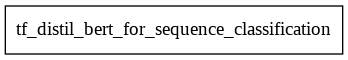

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [ ]:

hist = learner.fit_onecycle(2e-5, 7)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/7
422/422 [==============================] - 425s 977ms/step - loss: 1.0826 - accuracy: 0.3890 - val_loss: 1.0310 - val_accuracy: 0.4830
Epoch 2/7
422/422 [==============================] - 415s 982ms/step - loss: 1.0199 - accuracy: 0.4803 - val_loss: 0.9358 - val_accuracy: 0.5627
Epoch 3/7
422/422 [==============================] - 412s 974ms/step - loss: 0.9470 - accuracy: 0.5437 - val_loss: 0.8390 - val_accuracy: 0.6525
Epoch 4/7
422/422 [==============================] - 409s 966ms/step - loss: 0.8414 - accuracy: 0.6279 - val_loss: 0.6259 - val_accuracy: 0.7753
Epoch 5/7
422/422 [==============================] - 408s 966ms/step - loss: 0.6395 - accuracy: 0.7364 - val_loss: 0.3719 - val_accuracy: 0.8767
Epoch 6/7
422/422 [==============================] - 408s 966ms/step - loss: 0.4002 - accuracy: 0.8538 - val_loss: 0.2009 - val_accuracy: 0.9404
Epoch 7/7
422/422 [==============================] - 409s 966ms/ste

In [ ]:
learner.validate(val_data=val, class_names= class_names)

              precision    recall  f1-score   support

           💁       0.93      0.98      0.95      1121
           🤦       0.98      0.96      0.97      1120
           🤷       0.98      0.95      0.96      1132

    accuracy                           0.96      3373
   macro avg       0.96      0.96      0.96      3373
weighted avg       0.96      0.96      0.96      3373



array([[1093,   14,   14],
       [  29, 1078,   13],
       [  53,    9, 1070]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.get_classes()

['💁', '🤦', '🤷']

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score
import itertools
import matplotlib.pyplot as plt

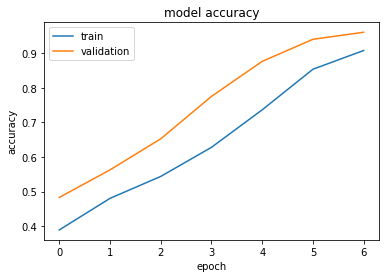

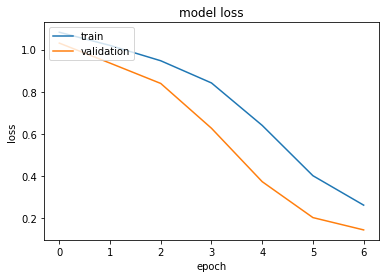

In [ ]:

# Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
predictions = [predictor.predict(pred) for pred in x_test]
print(precision_recall_fscore_support(data_test.Emoji, predictions, average='weighted', zero_division='warn'))

(0.9616098898453362, 0.9608656981915209, 0.9609596152565375, None)



F1 Score: 96.09


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128129 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129335 missing from current font.
  font.se

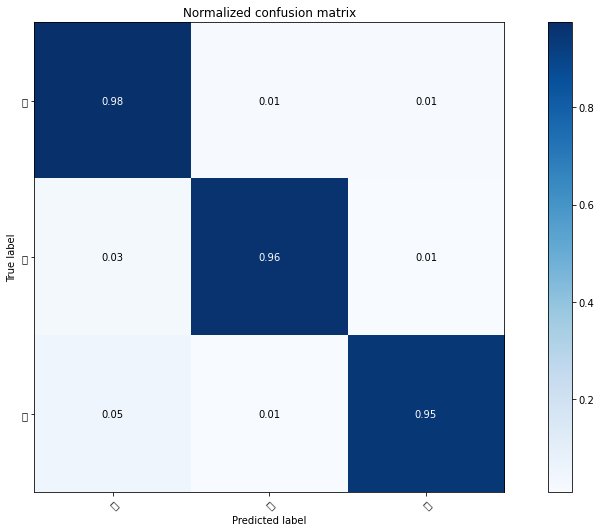

Message: পথ শিশুদের নিয়ে কাজ করছে লোকাল এডুকেশন অ্যান্ড ইকোনমিক ডেভেলপমেন্ট (লিডো) নামের একটি এনজিও
Predicted: 💁


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=confusion_matrix,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emoji, predictions, average='micro') * 100))

plot_confusion_matrix(data_test.Emoji, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
#plot_confusion_matrix(y_true,y_pred,classes=class_names)
plt.show()

print('Message: {}\nPredicted: {}'.format(x_test[10], predictions[10]))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(data_test.Emoji, predictions)))

print('Micro Precision: {:.2f}'.format(precision_score(data_test.Emoji, predictions, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(data_test.Emoji, predictions, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(data_test.Emoji, predictions, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(data_test.Emoji, predictions, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(data_test.Emoji, predictions, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(data_test.Emoji, predictions, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(data_test.Emoji, predictions, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(data_test.Emoji, predictions, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(data_test.Emoji, predictions, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(data_test.Emoji, predictions, target_names=class_names))


Accuracy: 0.96

Micro Precision: 0.96
Micro Recall: 0.96
Micro F1-score: 0.96

Macro Precision: 0.96
Macro Recall: 0.96
Macro F1-score: 0.96

Weighted Precision: 0.96
Weighted Recall: 0.96
Weighted F1-score: 0.96

Classification Report

              precision    recall  f1-score   support

           💁       0.93      0.98      0.95      1121
           🤦       0.98      0.96      0.97      1120
           🤷       0.98      0.95      0.96      1132

    accuracy                           0.96      3373
   macro avg       0.96      0.96      0.96      3373
weighted avg       0.96      0.96      0.96      3373



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn import metrics

cm = confusion_matrix(data_test.Emoji, predictions)

TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]


In [ ]:
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))

Sensitivity :  0.9741532976827094
Specificity :  0.9871794871794872
false positive rate :  0.01282051282051282
false negative rate :  0.025846702317290554
Negative Predictive Value :  0.973803071364047
False Discovery rate :  0.012646793134598013


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,model.predict(x_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,model.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test))))
print('Cohen_Kappa_Score:', cohen_kappa_score(data_test.Emoji, predictions))

TypeError: ignored

In [ ]:
import time 

message = 'শিশু শব্দটার সাথে মিশে আছে ভালোবাসা আদর এবং মমতা'

start_time = time.time() 
prediction = predictor.predict(message)

if prediction == '0':
  print('💁')
if prediction == '1':
  print('🤦')
if prediction == '2':
  print('🤷')

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: 💁 (0.09)


In [ ]:
predictor.save("models/roberta_model")